# 02 KNN算法

## 1. 简单demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [3]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

In [4]:
X_train

array([[3.39353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

In [5]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

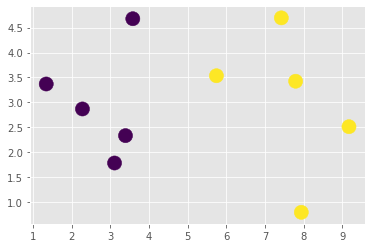

In [6]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,s=200)

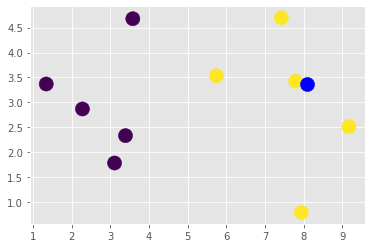

In [7]:
x = np.array([8.093607318, 3.365731514])

plt.scatter(X_train[:,0],X_train[:,1],c=y_train,s=200)
plt.scatter(x[0], x[1], color='b',s=200)

## KNN过程

In [8]:
from math import sqrt
distances = []
for x_train in X_train:
    d = sqrt(np.sum((x_train - x) ** 2))
    distances.append(d)
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

#### 等价计算方式，下面这个更好

In [9]:
distances =[sqrt(np.sum((x_train - x) ** 2)) for x_train in X_train]
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [10]:
nearest = np.argsort(distances)

In [11]:
k = 6

In [12]:
topk_y = [y_train[i] for i in nearest[:k]]
topk_y

[1, 1, 1, 1, 1, 0]

In [13]:
from collections import Counter
votes = Counter(topk_y)
predict_y = votes.most_common(1)[0][0]
predict_y

1

### 调用封装函数

In [14]:
%run code/kNN_function/kNN.py

<Figure size 432x288 with 0 Axes>

In [15]:
predict_y = kNN_classify(6, X_train, y_train, x)
predict_y

1

## 2. 使用scikit-learn

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
kNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [18]:
kNN_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [19]:
x = np.array([8.093607318, 3.365731514])
x = x.reshape(1,-1)
y_predict = kNN_classifier.predict(x)
y_predict

array([1])

## 3. 重新整理我们的kNN代码

In [20]:
%run code/kNN/kNN.py

In [21]:
knn_clf = KNNClassifier(k= 6)
knn_clf.fit(X_train, y_train)

KNN(k=6)

In [22]:
y_predict = knn_clf.predict(x)
y_predict

array([1])